In [2]:
# import the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request


In [3]:
#Download the Iris dataset from UCI ML Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
filename = "iris.data"
urllib.request.urlretrieve(url, filename)

('iris.data', <http.client.HTTPMessage at 0x1c87b441fc0>)

In [4]:
# Load the dataset into a pandas DataFrame
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv(filename, header=None, names=column_names)

In [5]:
# Map species names to numeric values
iris_df['species'] = iris_df['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [6]:
# Prepare the feature matrix and the target vector
X = iris_df.drop('species', axis=1)  # Features: sepal length, sepal width, petal length, petal width
y = iris_df['species']  # Target: Species (Setosa=0, Versicolor=1, Virginica=2)

In [7]:
# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Standardize the feature values for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Initialize and train the KNN classifier (K=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [12]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor', 'Virginica']))


Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [13]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


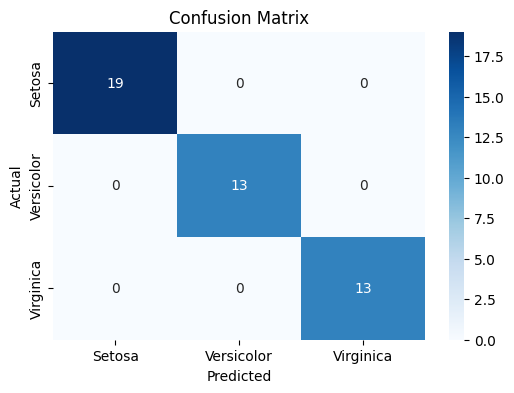

In [14]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()